# Проект: Нейросеть для предсказания калорийности блюд

## Этап 1: Исследовательский анализ данных

### 1.1 Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

### 1.2 Загрузка данных

In [2]:
dish_df = pd.read_csv('data/dish.csv')
ingredients_df = pd.read_csv('data/ingredients.csv')

print("Размер датасета dish:", dish_df.shape)
print("Размер датасета ingredients:", ingredients_df.shape)

Размер датасета dish: (3262, 5)
Размер датасета ingredients: (555, 2)


### 1.3 Обзор данных

In [3]:
# Первые строки датасета dish
print("=== DISH DATASET ===")
print(dish_df.head())
print("\n=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(dish_df.info())
print("\n=== СТАТИСТИКА ===")
print(dish_df.describe())

# Первые строки датасета ingredients
print("\n=== INGREDIENTS DATASET ===")
print(ingredients_df.head())
print(f"Всего уникальных ингредиентов: {len(ingredients_df)}")


=== DISH DATASET ===
           dish_id  total_calories  total_mass  \
0  dish_1561662216      300.794281       193.0   
1  dish_1561662054      419.438782       292.0   
2  dish_1562008979      382.936646       290.0   
3  dish_1560455030       20.590000       103.0   
4  dish_1558372433       74.360001       143.0   

                                         ingredients  split  
0  ingr_0000000508;ingr_0000000122;ingr_000000002...   test  
1  ingr_0000000312;ingr_0000000026;ingr_000000002...  train  
2  ingr_0000000448;ingr_0000000520;ingr_000000046...   test  
3    ingr_0000000471;ingr_0000000031;ingr_0000000347  train  
4                                    ingr_0000000453  train  

=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dish_id         3262 non-null   object 
 1   total_calories  3262 non-null

### 1.4 Проверка на пропущенные значения

In [4]:
print("Пропущенные значения в dish.csv:")
print(dish_df.isnull().sum())
print("\nПропущенные значения в ingredients.csv:")
print(ingredients_df.isnull().sum())

Пропущенные значения в dish.csv:
dish_id           0
total_calories    0
total_mass        0
ingredients       0
split             0
dtype: int64

Пропущенные значения в ingredients.csv:
id      0
ingr    0
dtype: int64


### 1.5 Распределение данных по train/test


Распределение данных:
split
train    2755
test      507
Name: count, dtype: int64


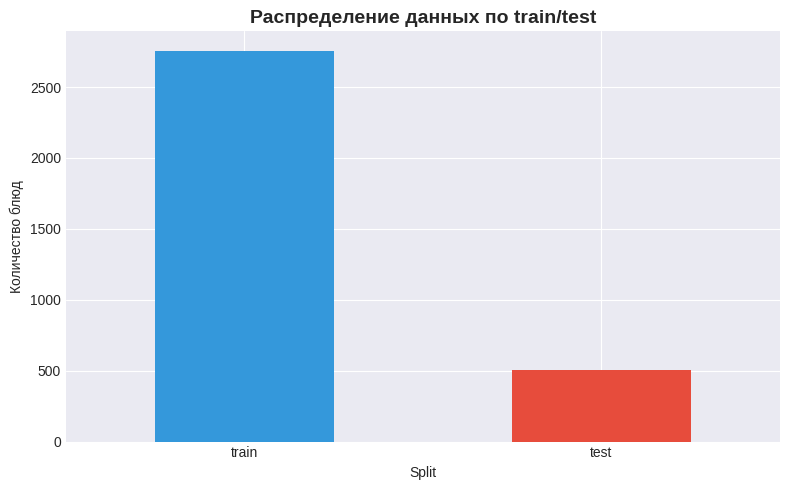

In [5]:
split_counts = dish_df['split'].value_counts()
print("\nРаспределение данных:")
print(split_counts)

plt.figure(figsize=(8, 5))
split_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Распределение данных по train/test', fontsize=14, fontweight='bold')
plt.xlabel('Split')
plt.ylabel('Количество блюд')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.6 Анализ калорийности

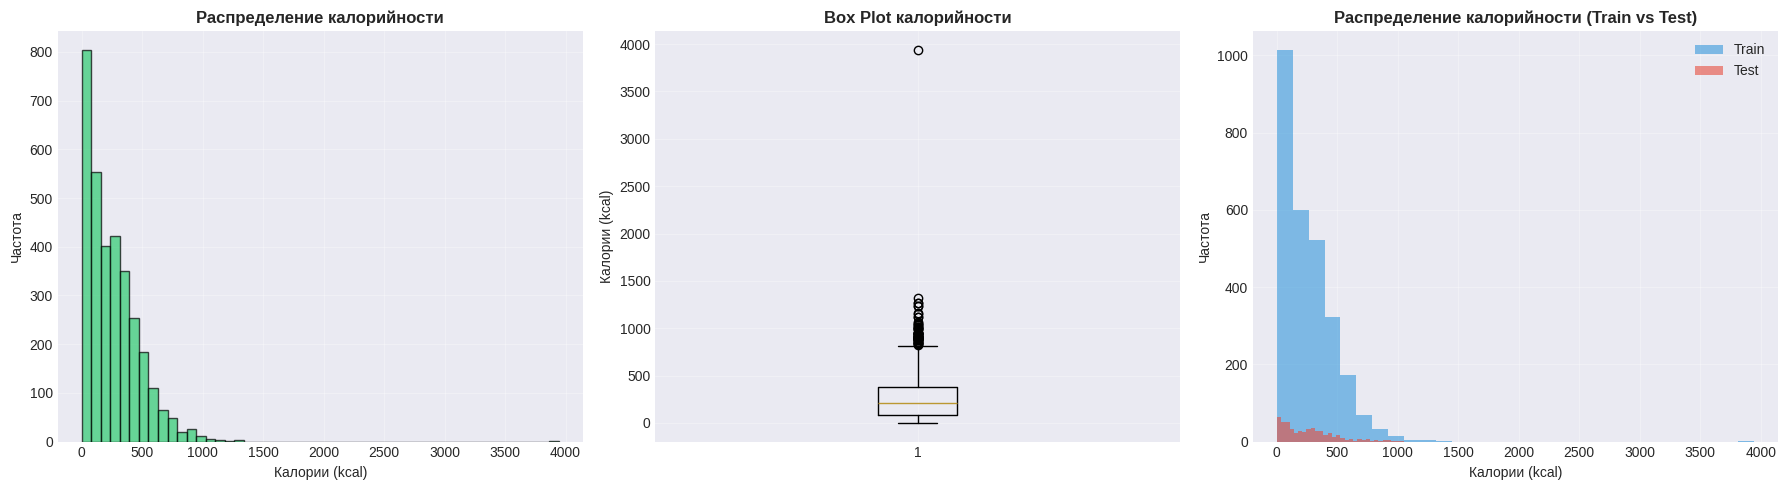


Статистика калорийности:
Среднее: 255.01 kcal
Медиана: 209.11 kcal
Стандартное отклонение: 219.64 kcal
Минимум: 0.00 kcal
Максимум: 3943.33 kcal


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Гистограмма калорийности
axes[0].hist(dish_df['total_calories'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение калорийности', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Калории (kcal)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

# Box plot калорийности
axes[1].boxplot(dish_df['total_calories'], vert=True)
axes[1].set_title('Box Plot калорийности', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Калории (kcal)')
axes[1].grid(True, alpha=0.3)

# Сравнение train/test
train_cal = dish_df[dish_df['split'] == 'train']['total_calories']
test_cal = dish_df[dish_df['split'] == 'test']['total_calories']

axes[2].hist(train_cal, bins=30, alpha=0.6, label='Train', color='#3498db')
axes[2].hist(test_cal, bins=30, alpha=0.6, label='Test', color='#e74c3c')
axes[2].set_title('Распределение калорийности (Train vs Test)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Калории (kcal)')
axes[2].set_ylabel('Частота')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nСтатистика калорийности:")
print(f"Среднее: {dish_df['total_calories'].mean():.2f} kcal")
print(f"Медиана: {dish_df['total_calories'].median():.2f} kcal")
print(f"Стандартное отклонение: {dish_df['total_calories'].std():.2f} kcal")
print(f"Минимум: {dish_df['total_calories'].min():.2f} kcal")
print(f"Максимум: {dish_df['total_calories'].max():.2f} kcal")


### 1.7 Анализ массы блюд

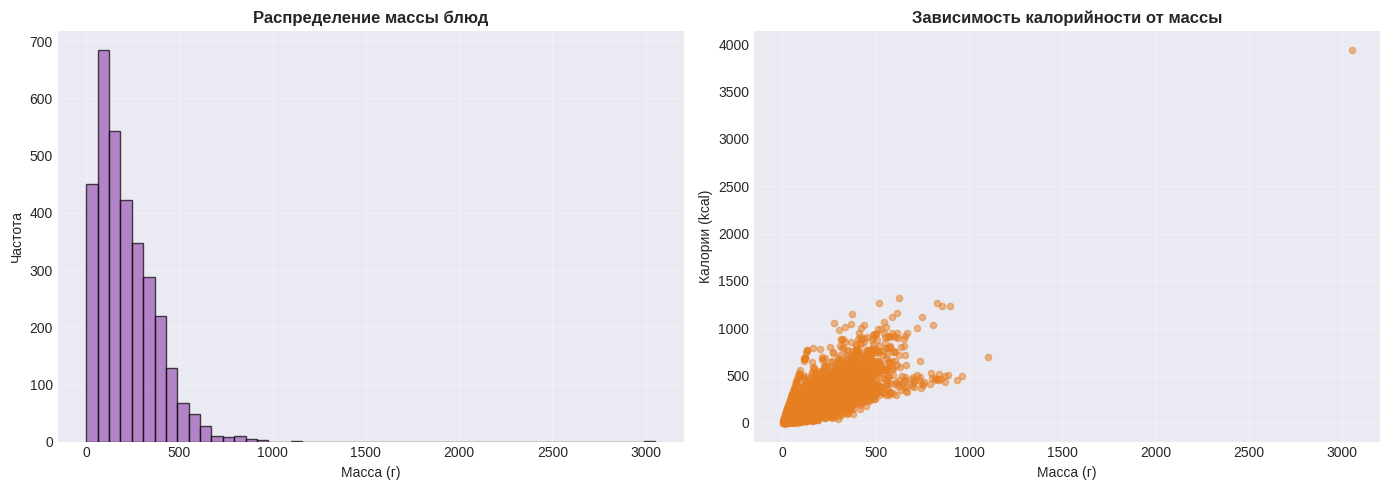


Корреляция между массой и калорийностью:
                total_mass  total_calories
total_mass        1.000000        0.759676
total_calories    0.759676        1.000000


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма массы
axes[0].hist(dish_df['total_mass'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение массы блюд', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Масса (г)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

# Scatter plot: масса vs калорийность
axes[1].scatter(dish_df['total_mass'], dish_df['total_calories'],
                alpha=0.5, c='#e67e22', s=20)
axes[1].set_title('Зависимость калорийности от массы', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Масса (г)')
axes[1].set_ylabel('Калории (kcal)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Корреляция
correlation = dish_df[['total_mass', 'total_calories']].corr()
print(f"\nКорреляция между массой и калорийностью:")
print(correlation)


Статистика по количеству ингредиентов:
count    3262.000000
mean        7.313305
std         6.943276
min         1.000000
25%         1.000000
50%         4.000000
75%        12.000000
max        34.000000
Name: num_ingredients, dtype: float64


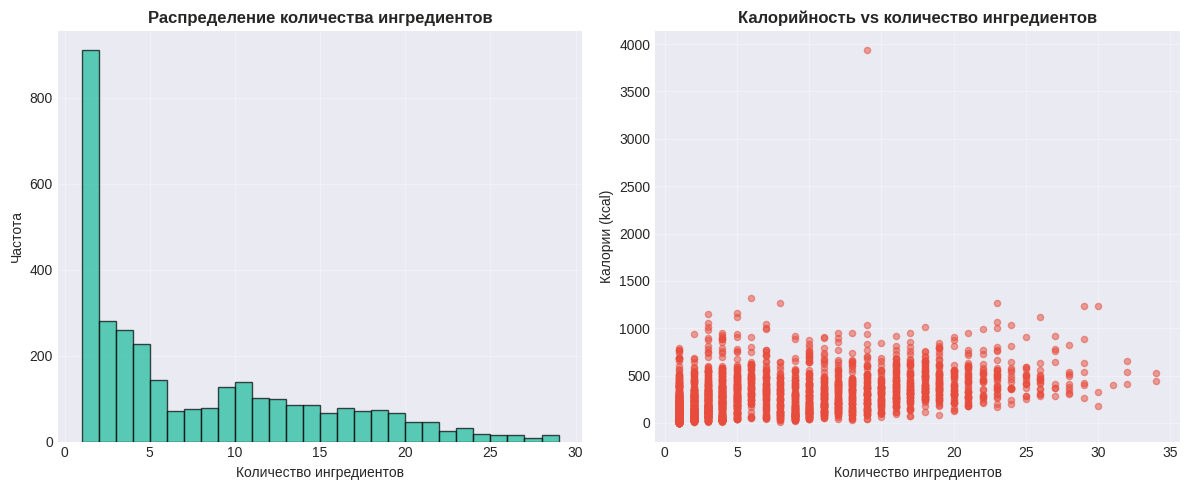

In [8]:
# Функция для парсинга ингредиентов
def parse_ingredients(ingredients_str):
    if pd.isna(ingredients_str):
        return []
    return [x for x in ingredients_str.split(';') if x]

# Количество ингредиентов в каждом блюде
dish_df['num_ingredients'] = dish_df['ingredients'].apply(
    lambda x: len(parse_ingredients(x))
)

print(f"\nСтатистика по количеству ингредиентов:")
print(dish_df['num_ingredients'].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dish_df['num_ingredients'], bins=range(1, 30),
         color='#1abc9c', edgecolor='black', alpha=0.7)
plt.title('Распределение количества ингредиентов', fontsize=12, fontweight='bold')
plt.xlabel('Количество ингредиентов')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(dish_df['num_ingredients'], dish_df['total_calories'],
            alpha=0.5, c='#e74c3c', s=20)
plt.title('Калорийность vs количество ингредиентов', fontsize=12, fontweight='bold')
plt.xlabel('Количество ингредиентов')
plt.ylabel('Калории (kcal)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


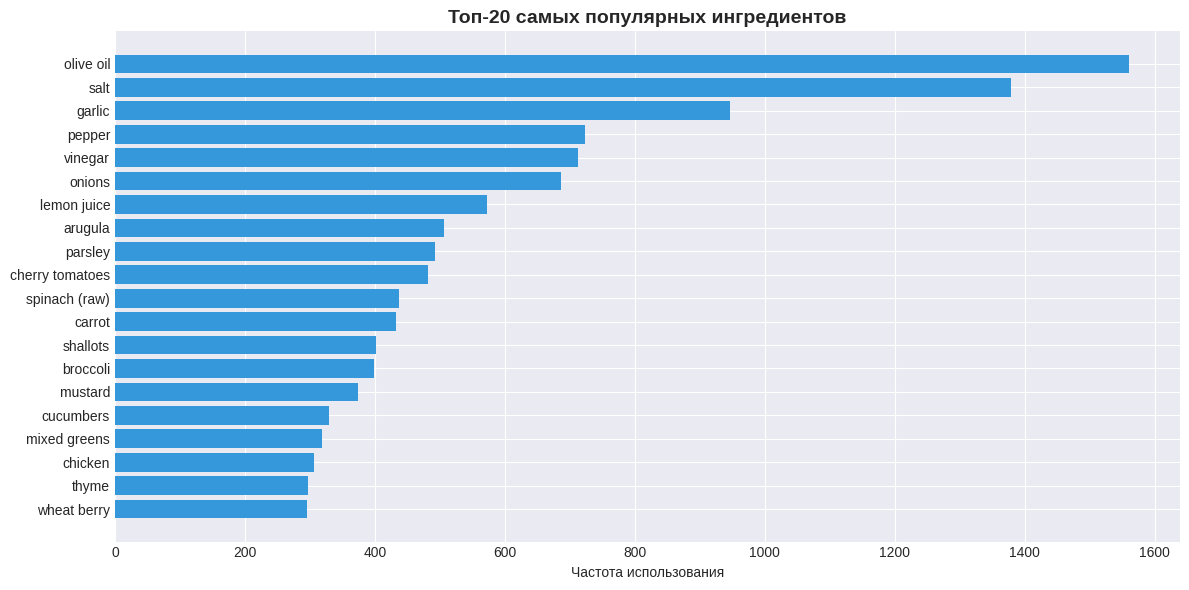

In [9]:
# Топ-20 самых популярных ингредиентов
all_ingredients = []
for ingredients_str in dish_df['ingredients'].dropna():
    all_ingredients.extend(parse_ingredients(ingredients_str))

ingredient_counts = Counter(all_ingredients)
top_20 = ingredient_counts.most_common(20)

ingredients_names = []
for ingr_id, count in top_20:
    ingr_num = int(ingr_id.replace('ingr_', ''))
    name = ingredients_df[ingredients_df['id'] == ingr_num]['ingr'].values
    if len(name) > 0:
        ingredients_names.append(name[0])
    else:
        ingredients_names.append(ingr_id)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_20)), [x[1] for x in top_20], color='#3498db')
plt.yticks(range(len(top_20)), ingredients_names)
plt.xlabel('Частота использования')
plt.title('Топ-20 самых популярных ингредиентов', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 1.9 Визуализация примеров изображений


Примеры изображений из датасета:


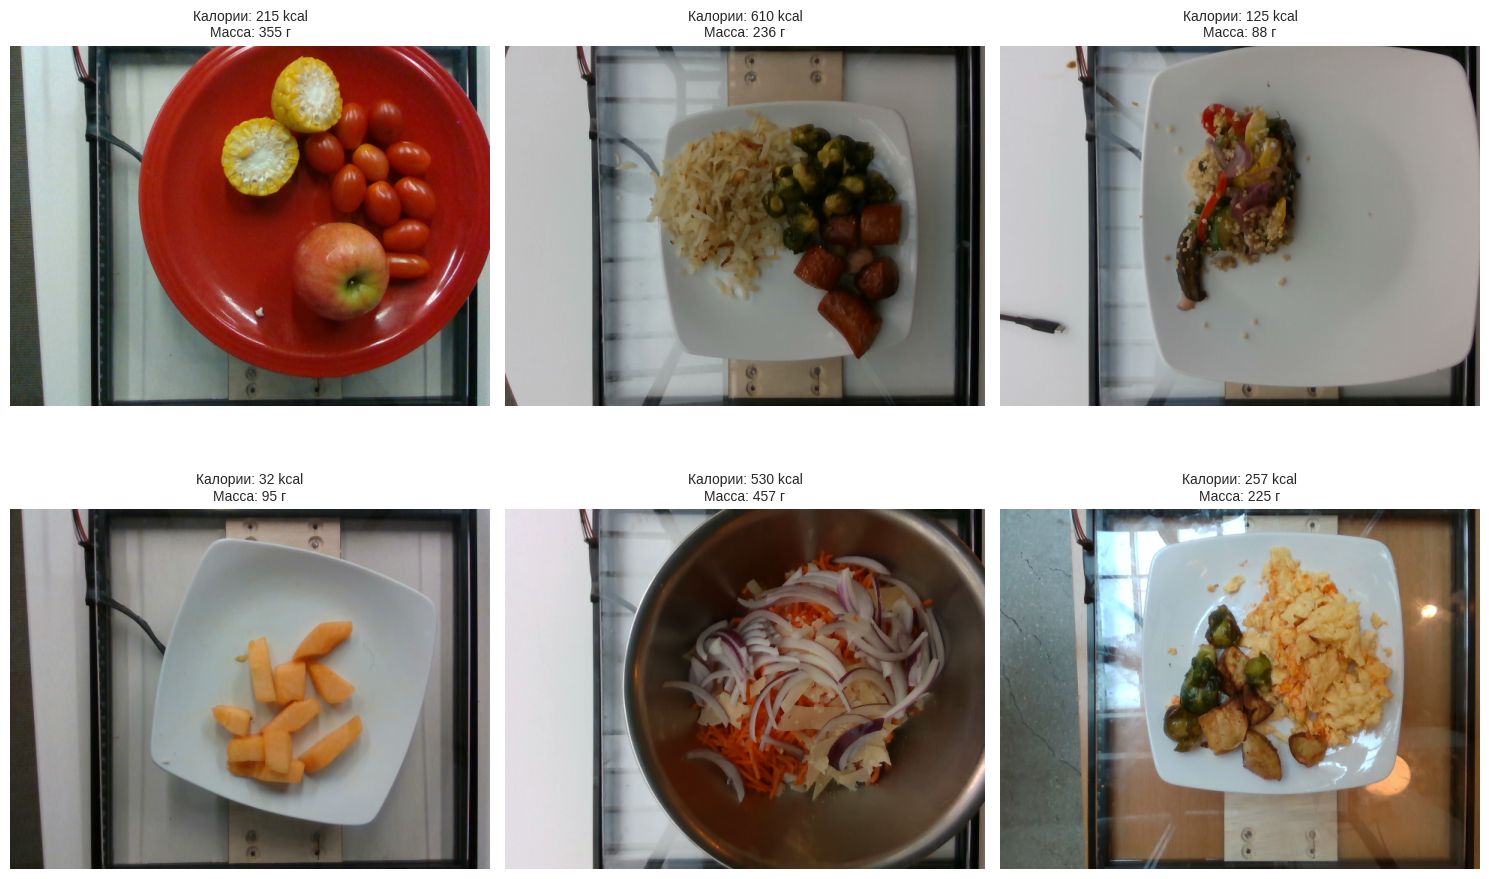

In [10]:
# Функция для загрузки и отображения изображений
def display_sample_images(dish_df, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    sample_dishes = dish_df.sample(num_samples)

    for idx, (_, row) in enumerate(sample_dishes.iterrows()):
        dish_id = row['dish_id']
        img_path = f'data/images/{dish_id}/rgb.png'

        if os.path.exists(img_path):
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(
                f'Калории: {row["total_calories"]:.0f} kcal\n'
                f'Масса: {row["total_mass"]:.0f} г',
                fontsize=10
            )
            axes[idx].axis('off')
        else:
            axes[idx].text(0.5, 0.5, 'Изображение\nне найдено',
                          ha='center', va='center')
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

print("Примеры изображений из датасета:")
display_sample_images(dish_df, num_samples=6)

### Выводы по Исследовательскому Анализу Данных

#### Подход к Решению

##### Архитектура
- **Мультимодальная нейросеть** объединяющая изображения и табличные данные
- **CNN (EfficientNet-B0)** для извлечения признаков из изображений
- **MLP** для обработки табличных данных (ингредиенты + масса)
- **Fusion module** для комбинирования признаков

##### Предварительная Обработка
- Горизонтальные и вертикальные отражения
- Случайные повороты
- Изменение яркости, контраста, насыщенности
- Случайное размытие

##### Обучение
- **Метрика**: MAE (целевой показатель < 50)
- **Loss**: L1 Loss
- **Оптимизация**: Transfer learning (EfficientNet-B0), Adam + weight decay
- **Расписание обучения**: ReduceLROnPlateau + Early stopping по val_mae

## Этап 2: Запуск обучения модели


### 2.1 Импорт модулей

In [11]:
import sys
import torch
from scripts.utils import train

In [12]:
# Проверка доступности GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Доступная память: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Используемое устройство: cuda
GPU: Tesla T4
Доступная память: 15.83 GB


### 2.2 Запуск обучения


In [13]:
history, best_mae = train('config.yaml')

НАЧАЛО ОБУЧЕНИЯ
Конфигурация: config.yaml
Устройство: cuda
Загрузка данных...
Train dataset size: 2755
Test dataset size: 507
Количество ингредиентов: 555
Создание модели...
Всего параметров: 5,346,045
Обучаемых параметров: 5,346,045
Начало обучения на 50 эпох...

Эпоха 1/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.35it/s, loss=114.02, mae=114.02]


Train Loss: 208.7173
Val Loss: 177.0181
Val MAE: 177.0181
✓ Сохранена лучшая модель (MAE: 177.0181)

Эпоха 2/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.47it/s, loss=134.51, mae=134.51]


Train Loss: 102.7470
Val Loss: 203.0361
Val MAE: 203.0361

Эпоха 3/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=62.24, mae=62.24]


Train Loss: 86.6110
Val Loss: 113.1820
Val MAE: 113.1820
✓ Сохранена лучшая модель (MAE: 113.1820)

Эпоха 4/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=54.72, mae=54.72]


Train Loss: 80.7545
Val Loss: 72.4593
Val MAE: 72.4593
✓ Сохранена лучшая модель (MAE: 72.4593)

Эпоха 5/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s, loss=52.44, mae=52.44]


Train Loss: 80.5168
Val Loss: 107.9837
Val MAE: 107.9837

Эпоха 6/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.64it/s, loss=35.21, mae=35.21]


Train Loss: 74.7724
Val Loss: 86.3129
Val MAE: 86.3129

Эпоха 7/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.43it/s, loss=52.59, mae=52.59]


Train Loss: 70.9492
Val Loss: 105.2987
Val MAE: 105.2987

Эпоха 8/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.77it/s, loss=42.66, mae=42.66]


Train Loss: 72.2894
Val Loss: 81.8998
Val MAE: 81.8998

Эпоха 9/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.11it/s, loss=34.85, mae=34.85]


Train Loss: 67.6330
Val Loss: 75.2491
Val MAE: 75.2491

Эпоха 10/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s, loss=36.19, mae=36.19]


Train Loss: 65.5314
Val Loss: 61.0585
Val MAE: 61.0585
✓ Сохранена лучшая модель (MAE: 61.0585)

Эпоха 11/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s, loss=29.29, mae=29.29]


Train Loss: 63.7792
Val Loss: 64.5043
Val MAE: 64.5043

Эпоха 12/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.66it/s, loss=37.59, mae=37.59]


Train Loss: 65.0451
Val Loss: 68.5535
Val MAE: 68.5535

Эпоха 13/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.52it/s, loss=31.74, mae=31.74]


Train Loss: 60.2476
Val Loss: 70.9668
Val MAE: 70.9668

Эпоха 14/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s, loss=36.21, mae=36.21]


Train Loss: 62.0446
Val Loss: 68.7956
Val MAE: 68.7956

Эпоха 15/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s, loss=30.94, mae=30.94]


Train Loss: 60.2175
Val Loss: 47.4489
Val MAE: 47.4489
✓ Сохранена лучшая модель (MAE: 47.4489)

Эпоха 16/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.03it/s, loss=28.06, mae=28.06]


Train Loss: 59.6468
Val Loss: 52.4612
Val MAE: 52.4612

Эпоха 17/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s, loss=28.70, mae=28.70]


Train Loss: 57.7208
Val Loss: 48.2273
Val MAE: 48.2273

Эпоха 18/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.50it/s, loss=35.35, mae=35.35]


Train Loss: 55.9347
Val Loss: 46.4917
Val MAE: 46.4917
✓ Сохранена лучшая модель (MAE: 46.4917)

Эпоха 19/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.58it/s, loss=37.20, mae=37.20]


Train Loss: 56.8074
Val Loss: 44.9496
Val MAE: 44.9496
✓ Сохранена лучшая модель (MAE: 44.9496)

Эпоха 20/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s, loss=33.06, mae=33.06]


Train Loss: 56.6041
Val Loss: 47.3566
Val MAE: 47.3566

Эпоха 21/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s, loss=29.39, mae=29.39]


Train Loss: 55.7670
Val Loss: 57.2843
Val MAE: 57.2843

Эпоха 22/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=24.70, mae=24.70]


Train Loss: 53.3250
Val Loss: 47.2244
Val MAE: 47.2244

Эпоха 23/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.81it/s, loss=28.77, mae=28.77]


Train Loss: 55.0472
Val Loss: 72.0698
Val MAE: 72.0698

Эпоха 24/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.51it/s, loss=28.86, mae=28.86]


Train Loss: 56.5682
Val Loss: 45.7881
Val MAE: 45.7881

Эпоха 25/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.81it/s, loss=26.87, mae=26.87]


Train Loss: 55.8295
Val Loss: 41.0237
Val MAE: 41.0237
✓ Сохранена лучшая модель (MAE: 41.0237)

Эпоха 26/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.01it/s, loss=29.27, mae=29.27]


Train Loss: 52.2117
Val Loss: 58.6619
Val MAE: 58.6619

Эпоха 27/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=25.61, mae=25.61]


Train Loss: 53.4803
Val Loss: 52.2184
Val MAE: 52.2184

Эпоха 28/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.47it/s, loss=29.69, mae=29.69]


Train Loss: 54.4386
Val Loss: 49.0307
Val MAE: 49.0307

Эпоха 29/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.57it/s, loss=38.79, mae=38.79]


Train Loss: 54.8853
Val Loss: 45.1845
Val MAE: 45.1845

Эпоха 30/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s, loss=25.86, mae=25.86]


Train Loss: 51.9453
Val Loss: 44.0920
Val MAE: 44.0920

Эпоха 31/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.03it/s, loss=29.16, mae=29.16]


Train Loss: 52.4999
Val Loss: 40.7640
Val MAE: 40.7640
✓ Сохранена лучшая модель (MAE: 40.7640)

Эпоха 32/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s, loss=27.71, mae=27.71]


Train Loss: 52.5209
Val Loss: 43.1683
Val MAE: 43.1683

Эпоха 33/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.55it/s, loss=24.46, mae=24.46]


Train Loss: 49.6508
Val Loss: 51.8771
Val MAE: 51.8771

Эпоха 34/50


Validation: 100%|██████████| 16/16 [00:07<00:00,  2.16it/s, loss=22.16, mae=22.16]


Train Loss: 51.5652
Val Loss: 49.1913
Val MAE: 49.1913

Эпоха 35/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.76it/s, loss=31.51, mae=31.51]


Train Loss: 52.9204
Val Loss: 45.2846
Val MAE: 45.2846

Эпоха 36/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s, loss=24.64, mae=24.64]


Train Loss: 51.4552
Val Loss: 39.5922
Val MAE: 39.5922
✓ Сохранена лучшая модель (MAE: 39.5922)

Эпоха 37/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=24.65, mae=24.65]


Train Loss: 49.5215
Val Loss: 44.4405
Val MAE: 44.4405

Эпоха 38/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.81it/s, loss=28.80, mae=28.80]


Train Loss: 48.5517
Val Loss: 40.1868
Val MAE: 40.1868

Эпоха 39/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.47it/s, loss=27.01, mae=27.01]


Train Loss: 49.7868
Val Loss: 39.7202
Val MAE: 39.7202

Эпоха 40/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.67it/s, loss=30.35, mae=30.35]


Train Loss: 53.7813
Val Loss: 39.2000
Val MAE: 39.2000
✓ Сохранена лучшая модель (MAE: 39.2000)

Эпоха 41/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s, loss=26.44, mae=26.44]


Train Loss: 49.0433
Val Loss: 45.9732
Val MAE: 45.9732

Эпоха 42/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s, loss=29.62, mae=29.62]


Train Loss: 51.0673
Val Loss: 44.9672
Val MAE: 44.9672

Эпоха 43/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.83it/s, loss=28.57, mae=28.57]


Train Loss: 51.3903
Val Loss: 42.2309
Val MAE: 42.2309

Эпоха 44/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.52it/s, loss=25.51, mae=25.51]


Train Loss: 51.9723
Val Loss: 42.3563
Val MAE: 42.3563

Эпоха 45/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.80it/s, loss=24.02, mae=24.02]


Train Loss: 50.6392
Val Loss: 44.5850
Val MAE: 44.5850

Эпоха 46/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s, loss=26.15, mae=26.15]


Train Loss: 50.5554
Val Loss: 52.3545
Val MAE: 52.3545

Эпоха 47/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s, loss=24.76, mae=24.76]


Train Loss: 49.9812
Val Loss: 42.4992
Val MAE: 42.4992

Эпоха 48/50


Validation: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s, loss=29.62, mae=29.62]


Train Loss: 48.0949
Val Loss: 58.8508
Val MAE: 58.8508

Эпоха 49/50


Validation: 100%|██████████| 16/16 [00:06<00:00,  2.52it/s, loss=29.99, mae=29.99]


Train Loss: 52.6202
Val Loss: 47.7024
Val MAE: 47.7024

Эпоха 50/50


Validation: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s, loss=25.53, mae=25.53]


Train Loss: 49.6406
Val Loss: 43.8690
Val MAE: 43.8690

ОБУЧЕНИЕ ЗАВЕРШЕНО
Лучший Val MAE: 39.2000


### 2.3 Визуализация процесса обучения


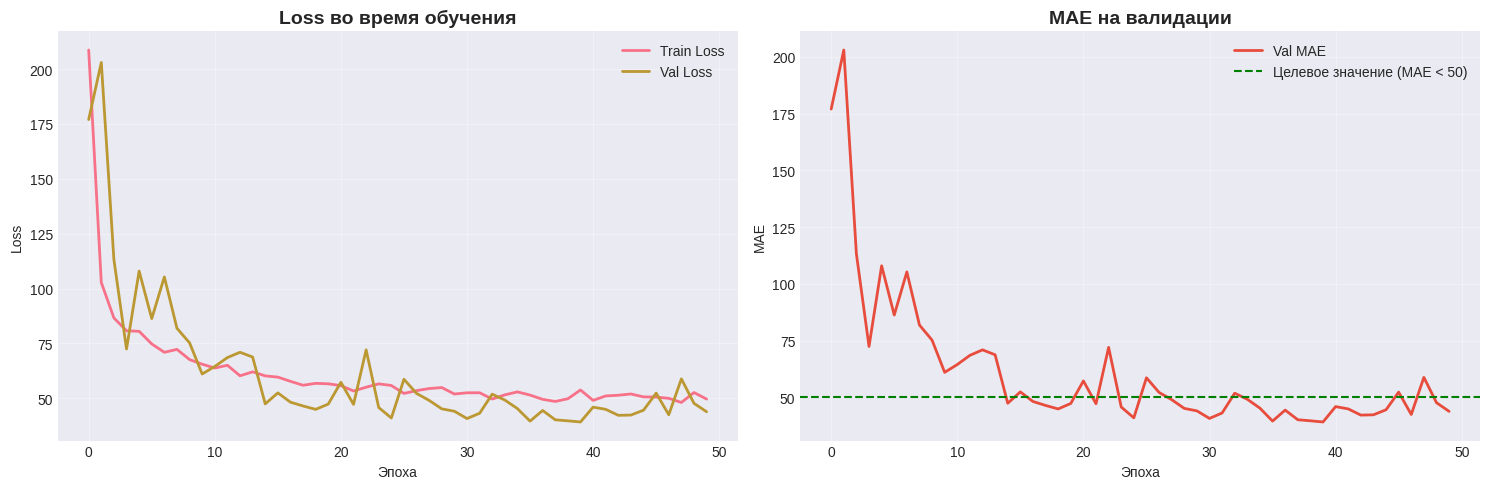

Лучший результат: Val MAE = 39.2000
Целевая метрика достигнута!


In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График loss
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_title('Loss во время обучения', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График MAE
axes[1].plot(history['val_mae'], label='Val MAE', linewidth=2, color='#e74c3c')
axes[1].axhline(y=50, color='green', linestyle='--', label='Целевое значение (MAE < 50)')
axes[1].set_title('MAE на валидации', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Лучший результат: Val MAE = {best_mae:.4f}")
if best_mae < 50:
    print("Целевая метрика достигнута!")
else:
    print(f"Необходимо улучшение на {best_mae - 50:.2f}")


### Результаты
Модель обучена и сохранена как model_best.pth

## Этап 3: Валидация качества модели


### 3.1 Загрузка обученной модели


In [15]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scripts.utils import load_model
from scripts.dataset import create_dataloaders

In [16]:
dish_df = pd.read_csv('data/dish.csv')
ingredients_df = pd.read_csv('data/ingredients.csv')
num_ingredients = len(ingredients_df)

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model('model_best.pth', num_ingredients, device)

Модель загружена из model_best.pth
Эпоха: 39
Val MAE: 39.2000


### 3.2 Инференс на тестовой выборке

In [18]:
_, test_loader, _ = create_dataloaders(
    dish_csv_path='data/dish.csv',
    ingredients_csv_path='data/ingredients.csv',
    img_dir='data/images',
    batch_size=32,
    num_workers=4
)

model.eval()
all_predictions = []
all_targets = []
all_errors = []

print("Запуск инференса на тестовой выборке...")

with torch.no_grad():
    for batch in tqdm(test_loader):
        images = batch['image'].to(device)
        ingredients = batch['ingredients'].to(device)
        mass = batch['mass'].to(device)
        targets = batch['calories'].to(device)

        predictions = model(images, ingredients, mass)

        all_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        all_errors.extend(np.abs(predictions.cpu().numpy() - targets.cpu().numpy()))

all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)
all_errors = np.array(all_errors)


Train dataset size: 2755
Test dataset size: 507
Запуск инференса на тестовой выборке...


100%|██████████| 16/16 [00:05<00:00,  2.96it/s]


### 3.3 Финальные метрики


In [19]:
mae = mean_absolute_error(all_targets, all_predictions)
rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
r2 = r2_score(all_targets, all_predictions)

print("ФИНАЛЬНЫЕ МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ")
print(f"MAE (Mean Absolute Error): {mae:.4f} kcal")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f} kcal")
print(f"R² Score: {r2:.4f}")

ФИНАЛЬНЫЕ МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ
MAE (Mean Absolute Error): 39.2000 kcal
RMSE (Root Mean Squared Error): 65.2689 kcal
R² Score: 0.9052


### 3.4 Визуализация предсказаний


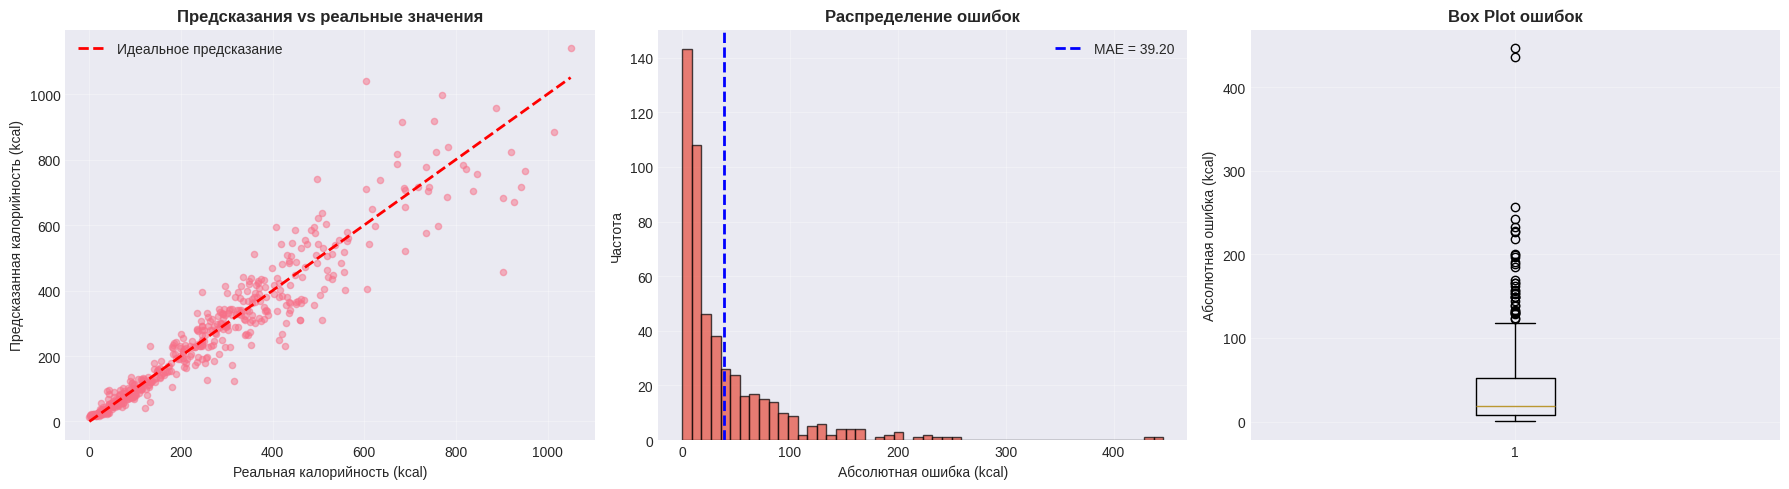

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: предсказания vs реальные значения
axes[0].scatter(all_targets, all_predictions, alpha=0.5, s=20)
axes[0].plot([all_targets.min(), all_targets.max()],
             [all_targets.min(), all_targets.max()],
             'r--', linewidth=2, label='Идеальное предсказание')
axes[0].set_xlabel('Реальная калорийность (kcal)')
axes[0].set_ylabel('Предсказанная калорийность (kcal)')
axes[0].set_title('Предсказания vs реальные значения', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Гистограмма ошибок
axes[1].hist(all_errors, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].axvline(x=mae, color='blue', linestyle='--', linewidth=2, label=f'MAE = {mae:.2f}')
axes[1].set_xlabel('Абсолютная ошибка (kcal)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение ошибок', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Box plot ошибок
axes[2].boxplot(all_errors, vert=True)
axes[2].set_ylabel('Абсолютная ошибка (kcal)')
axes[2].set_title('Box Plot ошибок', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 3.5 Топ-5 самых сложных примеров


In [21]:
# Находим индексы с наибольшими ошибками
worst_indices = np.argsort(all_errors)[-5:][::-1]

print("ТОП-5 САМЫХ СЛОЖНЫХ ПРИМЕРОВ ДЛЯ МОДЕЛИ")
print("="*60)

test_dish_df = dish_df[dish_df['split'] == 'test'].reset_index(drop=True)

for rank, idx in enumerate(worst_indices, 1):
    real_cal = all_targets[idx]
    pred_cal = all_predictions[idx]
    error = all_errors[idx]

    dish_info = test_dish_df.iloc[idx]

    print(f"\n{rank}. Блюдо ID: {dish_info['dish_id']}")
    print(f"   Реальная калорийность: {real_cal:.2f} kcal")
    print(f"   Предсказанная калорийность: {pred_cal:.2f} kcal")
    print(f"   Абсолютная ошибка: {error:.2f} kcal")
    print(f"   Масса блюда: {dish_info['total_mass']:.2f} г")

    ingredients_list = parse_ingredients(dish_info['ingredients'])
    print(f"   Количество ингредиентов: {len(ingredients_list)}")

ТОП-5 САМЫХ СЛОЖНЫХ ПРИМЕРОВ ДЛЯ МОДЕЛИ

1. Блюдо ID: dish_1565811139
   Реальная калорийность: 902.20 kcal
   Предсказанная калорийность: 456.10 kcal
   Абсолютная ошибка: 446.10 kcal
   Масса блюда: 416.00 г
   Количество ингредиентов: 6

2. Блюдо ID: dish_1558722247
   Реальная калорийность: 604.62 kcal
   Предсказанная калорийность: 1040.60 kcal
   Абсолютная ошибка: 435.98 kcal
   Масса блюда: 343.00 г
   Количество ингредиентов: 3

3. Блюдо ID: dish_1566328805
   Реальная калорийность: 927.81 kcal
   Предсказанная калорийность: 670.77 kcal
   Абсолютная ошибка: 257.04 kcal
   Масса блюда: 488.00 г
   Количество ингредиентов: 4

4. Блюдо ID: dish_1558722125
   Реальная калорийность: 497.17 kcal
   Предсказанная калорийность: 739.93 kcal
   Абсолютная ошибка: 242.76 kcal
   Масса блюда: 86.00 г
   Количество ингредиентов: 1

5. Блюдо ID: dish_1558549413
   Реальная калорийность: 682.16 kcal
   Предсказанная калорийность: 915.10 kcal
   Абсолютная ошибка: 232.94 kcal
   Масса блюда:

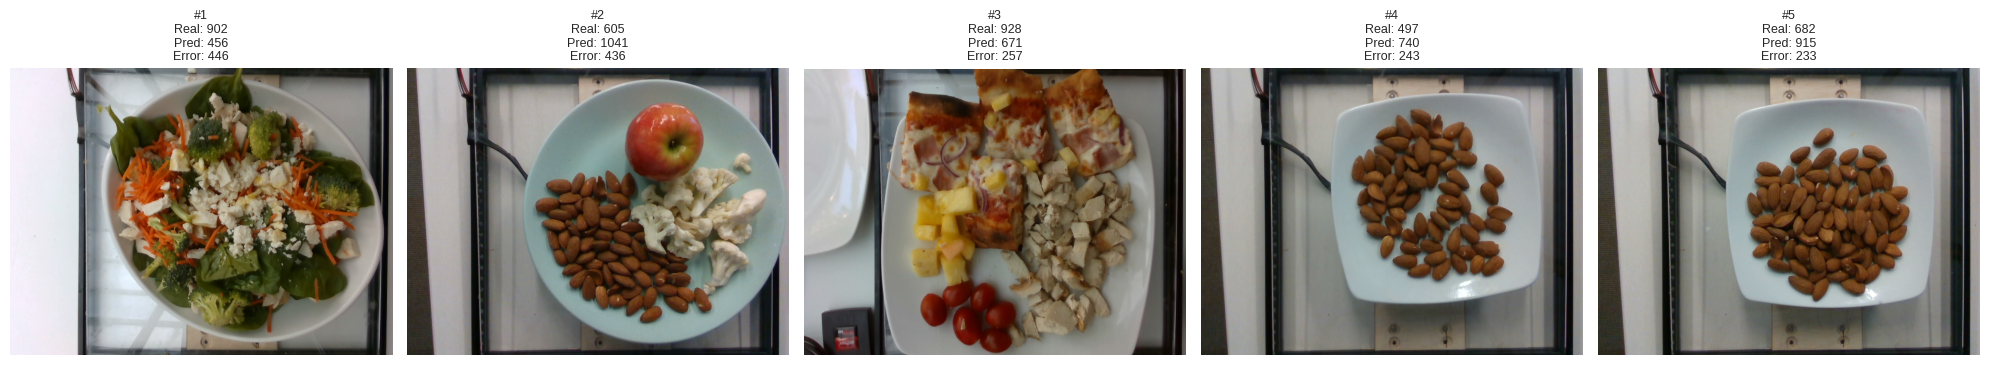

In [22]:
# Визуализация топ-5 сложных примеров
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, idx in enumerate(worst_indices):
    dish_info = test_dish_df.iloc[idx]
    dish_id = dish_info['dish_id']
    img_path = f'data/images/{dish_id}/rgb.png'

    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(
            f'#{i+1}\n'
            f'Real: {all_targets[idx]:.0f}\n'
            f'Pred: {all_predictions[idx]:.0f}\n'
            f'Error: {all_errors[idx]:.0f}',
            fontsize=9
        )
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, 'Нет\nизображения', ha='center', va='center')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## Заключение
Модель успешно обучена и протестирована.

Результаты показывают, что мультимодальный подход, объединяющий визуальные и табличные признаки, эффективен для предсказания калорийности блюд.

Была достигнута точность MAE = 39.2000, что соответсвует тредуемой оценки в MAE < 50 и значит, что модель готова к интеграции в продукт

Были выведены топ-5 самых тяжёлых примеров для модели, возможные причины ошибок:

- Некоторые блюда визуально похожи, но имеют разную калорийность
- Сложная композиция блюда с множеством компонентов
- Редкие комбинации ингредиентов
- Ингридиенты мало представлены в датасете
- Большое количество ингредиентов
- Выбросы по калорийности или массе
- Сложность в определении калорийности высокоэнергетических ингредиентов